# Data wrangling WeRateDogs

#### By: Yogini Jagdale

## Introduction

The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

# Gathering Data


1. Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv


2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


3. Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

####  Read Twitter archive file 

In [17]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
from timeit import default_timer as timer

In [19]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [20]:
twitter_archive.sort_values('timestamp')
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Read image predictions tsv

In [22]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )

In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file.

In [24]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

consumer_key = 'cEd72Qurcy1imZKc6jVBMn8qD'
consumer_secret = 'G2YSHy8RuYKiHpOZlhod6IueVF7GeYCCcN7bKKiQUTkthD4DlM'
access_token = '162999668-0QU33V0Xi0fNkjIka9CYiMnwX2TarDXWOHBeOM7Z'
access_secret = 'LIwpjuAak4it7Zbmt6rhkl50ZnCetZv1fmrOXuzx8Tt0U'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [26]:
# List of the error tweets
error_list = []
# List of tweets
df_list = []
# Calculate the time of execution
start = timer()

# For loop which will add each available tweet json to df_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] # How many followers the user had
        user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
        date_time = tweet['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
# Calculate the time of excution
end = timer()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
812747805718642688 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code

In [28]:
# lengh of the result
print("The lengh of the result", len(df_list))
# The tweet_id of the errors
print("The lengh of the errors", len(error_list))

The lengh of the result 2340
The lengh of the errors 16


In [29]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [30]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,38042,8322,7600088,140839,2017-08-01 16:23:56
1,892177421306343426,32659,6148,7600088,140839,2017-08-01 00:17:27
2,891815181378084864,24583,4069,7600088,140839,2017-07-31 00:18:03
3,891689557279858688,41400,8460,7600088,140839,2017-07-30 15:58:51
4,891327558926688256,39571,9163,7600088,140839,2017-07-29 16:00:24
5,891087950875897856,19870,3046,7600089,140839,2017-07-29 00:08:17
6,890971913173991426,11618,2020,7600089,140839,2017-07-28 16:27:12
7,890729181411237888,64202,18464,7600089,140839,2017-07-28 00:22:40
8,890609185150312448,27311,4188,7600089,140839,2017-07-27 16:25:51
9,890240255349198849,31326,7218,7600089,140839,2017-07-26 15:59:51


In [31]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id           2340 non-null int64
favorites          2340 non-null int64
retweets           2340 non-null int64
user_followers     2340 non-null int64
user_favourites    2340 non-null int64
date_time          2340 non-null object
dtypes: int64(5), object(1)
memory usage: 109.8+ KB


## Gather: Summary

Gathering is the first step in the data wrangling process.

 - Obtaining data
    -  Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas
    -  Downloading a file from the internet (image-predictions.tsv) Downloading file using requests
    -  Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy
 - Importing that data into our programming environment (Jupyter Notebook)

# Accessing

In [32]:
# Print some random examples
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1600,686007916130873345,NaN,NaN,2016-01-10 02:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper has a magical eye. 11/10 I can't s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,11,10,None,None,None,pupper,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
1142,727524757080539137,NaN,NaN,2016-05-03 15:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper had to undergo emergency haircut s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727524757...,10,10,None,None,None,pupper,None
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https:/...",13,10,Mingus,None,None,None,None
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,None,None,None,None
2206,668631377374486528,NaN,NaN,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,None,None,None,None
1173,720340705894408192,NaN,NaN,2016-04-13 19:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He just got balled on. Can't ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720340705...,10,10,Derek,None,None,pupper,None
2053,671485057807351808,NaN,NaN,2015-12-01 00:24:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She is a white Macadamias Duode...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671485057...,11,10,Penelope,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10,10,Chesney,None,None,None,None


In [33]:
# Assessing the data programmaticaly
twitter_archive.info()
twitter_archive.describe()
twitter_archive['rating_numerator'].value_counts()
twitter_archive['rating_denominator'].value_counts()
twitter_archive['name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Toby          7
Buddy         7
Daisy         7
Bailey        7
Dave          6
Leo           6
Scout         6
Milo          6
Stanley       6
Jax           6
Rusty         6
Bella         6
Jack          6
Koda          6
Oscar         6
Bentley       5
           ... 
Patch         1
Ester         1
Carll         1
Tayzie        1
Pilot         1
Bayley        1
Opie          1
Eugene        1
Andy          1
Vinnie        1
Gunner        1
Monkey        1
Brandi        1
Saydee        1
Strider       1
Tilly         1
Antony        1
Blue          1
Colin         1
Lenox         1
Vince         1
Combo         1
Blipson       1
Kawhi         1
Kody          1
Ace           1
Finnegus      1
Tom           1
Beebop        1
Leonidas      1
Name: name, Length: 957,

In [34]:
# View descriptive statistics of twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
image_predictions

In [35]:
image_predictions.info()
image_predictions['jpg_url'].value_counts()
image_predictions[image_predictions['jpg_url'] == 'https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True


In [36]:
# View number of entries for each source
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
#For rating that don't follow pattern
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [38]:
#unusual names
twitter_archive[twitter_archive['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [39]:
#Orignal Tweets 
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Quality

#### twitter_archive dataset
 - Several columns have empty values, like in_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
 - Name column have invalid names i.e 'None', 'a', 'an' and less than 3 characters.
 - The numerator and denominator columns have unusual values.
 - retweeted_status_timestamp, timestamp should be datetime instead of object (string).
 - In several columns, null values are not treated as null values.
 - We only want original ratings (no retweets) that have images.
 
#### image_predictions dataset
  - There are 2075 rows in the images dataframe and 2356 rows in the archive dataframe.
  - Some tweet_ids have the same jpg_url

### Tidiness
 - The dog stages have values as columns, instead of one column filled with their values.
 - We don't need the Unnamed: 0 column from the tweet dataframe.
 - The columns for dog breed predictions can be condensed.

## Cleaning

Cleaning our data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step.

In [40]:
#copy dataframes
tweet_data_clean = tweet_data.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()

#### Define
Add tweet_info and image_predictions to twitter_archive table.

#### Code

In [41]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [42]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 33 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
favorites                     2067 

#### Define
Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'.

#### Code

In [45]:
# Select the columns to melt and to remain
MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in twitter_archive_clean.columns.tolist() if x not in MELTS_COLUMNS]


# Melt the the columns into values
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
twitter_archive_clean = twitter_archive_clean.drop('stages', 1)

#### Test

In [46]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None       7934
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64
8268


#### Clean
Clean rows and columns that we will not need

#### Code

In [47]:
# Delete the retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

# Delete duplicated tweet_id
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

# Delete tweets with no pictures
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])

# small test
len(twitter_archive_clean)

2309

In [48]:
# Delete columns related to retweet we don't need anymore
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
twitter_archive_clean = twitter_archive_clean.drop('date_time', 1)

# small test
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

In [49]:
#Delete dog_stage duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#### Test

In [51]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))


None       1686
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64
1992


#### Define
Removing useless columns

#### Code

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 7085
Data columns (total 26 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null category
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
favorites                1992 non-null int32
retweets                 1992 non-null int32
user_followers           1992 non-null int32
user_favourites          1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                 

In [53]:
# let's concentrate on low values.. let's dig more

print('in_reply_to_user_id ')
print(twitter_archive_clean['in_reply_to_user_id'].value_counts())
print('source ')
print(twitter_archive_clean['source'].value_counts())
print('user_favourites ')
print(twitter_archive_clean['user_favourites'].value_counts())

in_reply_to_user_id 
4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64
source 
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64
user_favourites 
140839    1963
140838      29
Name: user_favourites, dtype: int64


 - One value in in_reply_to_user_id so we will delete the columns of reply all of them replying to @dog_rates.
 - user_favourites has 2 values and they are close.

In [54]:
# These all reply to a single user id, i.e., @dog_rates
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

#### Test

In [55]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,38042,8322,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1460,679877062409191424,2015-12-24 04:11:37,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,2062,687,...,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False,None
1459,680070545539371008,2015-12-24 17:00:27,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,2698,936,...,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False,None
1458,680085611152338944,2015-12-24 18:00:19,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,13410,9539,...,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False,None
1456,680115823365742593,2015-12-24 20:00:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9,10,Ozzy,2842,970,...,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True,None
1455,680130881361686529,2015-12-24 21:00:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. His Santa hat is a little big....,https://twitter.com/dog_rates/status/680130881...,10,10,Reggie,2394,1017,...,Maltese_dog,0.199121,True,West_Highland_white_terrier,0.197897,True,Shih-Tzu,0.157130,True,None
1453,680161097740095489,2015-12-24 23:00:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,2427,785,...,bluetick,0.268681,True,miniature_pinscher,0.125652,True,English_setter,0.089373,True,None
1450,680206703334408192,2015-12-25 02:01:30,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,https://twitter.com/dog_rates/status/680206703...,12,10,Toby,2975,1259,...,Christmas_stocking,0.149758,False,cloak,0.128830,False,teddy,0.109129,False,None
1449,680221482581123072,2015-12-25 03:00:14,"<a href=""http://twitter.com/download/iphone"" r...",This is CeCe. She's patiently waiting for Sant...,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,1519,306,...,bubble,0.240173,False,hen,0.146222,False,abaya,0.139342,False,None
1448,680440374763077632,2015-12-25 17:30:01,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,https://twitter.com/dog_rates/status/680440374...,11,10,None,1522,538,...,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False,None


#### Define
Get Dogs gender column from text column

#### Code

In [57]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in twitter_archive_clean['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_name'
twitter_archive_clean['dog_gender'] = dog_gender

#### Test

In [58]:
print("dog_gender count \n", twitter_archive_clean.dog_gender.value_counts())

dog_gender count 
 NaN       1132
male       634
female     226
Name: dog_gender, dtype: int64


#### Define
Change datatypes .

#### Code

In [59]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['favorites'] = twitter_archive_clean['favorites'].astype(int)
twitter_archive_clean['retweets'] = twitter_archive_clean['retweets'].astype(int)
twitter_archive_clean['user_followers'] = twitter_archive_clean['user_followers'].astype(int)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)
twitter_archive_clean['dog_gender'] = twitter_archive_clean['dog_gender'].astype('category')

#### Test

In [60]:
twitter_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
favorites                      int32
retweets                       int32
user_followers                 int32
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
dog_stage                   category
dog_gender                  category
dtype: object

#### Define
Convert the null values to None type

#### Code

In [64]:
#twitter_archive_clean.loc[twitter_archive_clean['prediction_algorithm'] == 'NaN', 'prediction_algorithm'] = None
twitter_archive_clean.loc[twitter_archive_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
#twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

#### Test

In [65]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 7085
Data columns (total 24 columns):
tweet_id              1992 non-null object
timestamp             1992 non-null datetime64[ns]
source                1992 non-null category
text                  1992 non-null object
expanded_urls         1992 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1992 non-null object
favorites             1992 non-null int32
retweets              1992 non-null int32
user_followers        1992 non-null int32
jpg_url               1992 non-null object
img_num               1992 non-null int64
p1                    1992 non-null object
p1_conf               1992 non-null float64
p1_dog                1992 non-null bool
p2                    1992 non-null object
p2_conf               1992 non-null float64
p2_dog                1992 non-null bool
p3                    1992 non-null object
p3_conf               1992 

#### Define
Condensing dog breed predictions
#### Code

In [78]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

twitter_archive_clean.apply(breed_conf, axis = 1)

twitter_archive_clean['breed'] = breed
twitter_archive_clean['confidence'] = conf

In [79]:
#removing the processed columns
twitter_archive_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

#### Test

In [80]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,img_num,dog_stage,dog_gender,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,38042,8322,7600088,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,None,NaN,Unidentifiable,0.0
1,679877062409191424,2015-12-24 04:11:37,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,2062,687,7600148,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,None,NaN,Unidentifiable,0.0


### Store

In [81]:
# Save clean DataFrame to csv file
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('./twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [83]:
twitter_archive_clean = pd.read_csv('./twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 17 columns):
tweet_id              1992 non-null int64
timestamp             1992 non-null object
source                1992 non-null object
text                  1992 non-null object
expanded_urls         1992 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1992 non-null object
favorites             1992 non-null int64
retweets              1992 non-null int64
user_followers        1992 non-null int64
jpg_url               1992 non-null object
img_num               1992 non-null int64
dog_stage             1992 non-null object
dog_gender            860 non-null object
breed                 1992 non-null object
confidence            1992 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 264.6+ KB


## Analysis

In [84]:
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

### Tweet Retweet Vs Favorites.

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

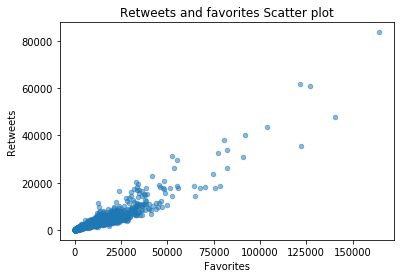

In [87]:
df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

As the correlation map shows that retweet is high correlated with favorites.

### Most Rated Breeds

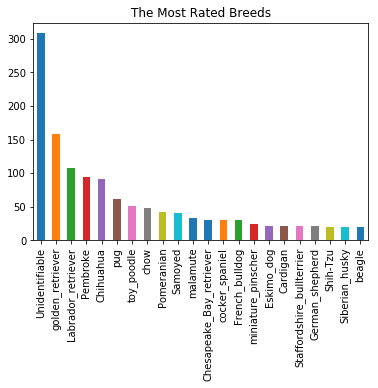

In [88]:
top=df.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');

### Dog Stages Stats

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

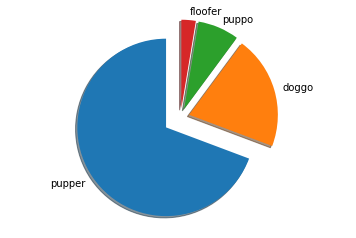

In [90]:
# Plot the data partitioned by dog stage
dog_stage_count = list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

In [91]:
df[df['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.888889
floofer    11.875000
pupper     10.726415
puppo      12.043478
Name: rating_numerator, dtype: float64

### Conclusion

The Twitter account WeRateDogs (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "16/10". It has acquired over 4.5 million followers.
